# Tim's Data Analysis for Congressional District Mapping

The primary purpose of this notebook is for initial data exploration by Tim Romer. This notebook will feature http requests to api's as well as trying to explore the data set.

In [1]:
# Meta-information for requesting data

CENSUS_API_KEY = '535963d4f87c22491889d73b8cc7889ee7d36465'
CURL_REQUEST = 'https://api.census.gov/data/2014/pep/natstprc.json?get=STNAME,POP&for=state:*&DATE_=7&key='+ CENSUS_API_KEY

To run this notebook, you will need to install an open source US Census Python wrapper. The link for install instructions is https://github.com/datamade/census.


This is a call to the api that will pull the population for all school districts in Ohio. For the purposes of this notebook we will use 2017 census data from the ACS5 Dataset.

In [2]:
import census 
from us import states

c = census.Census(CENSUS_API_KEY)
oh_school_pop = c.acs5.get(('NAME', 'B01001_001E'),
                              {'for': 'school district (unified):*',
                               'in': 'state:{}'.format(states.OH.fips)},
                          year = 2017
                          )

Now, let's parse the json and put it into a pandas data frame. Here, we will change the column names to more appropriate names.

In [3]:
import pandas as pd
import numpy as np

oh_school_pop_df = pd.DataFrame(oh_school_pop)

oh_school_pop_df.rename(columns = {'B01001_001E' : 'POP', 
                                   'NAME' : 'SD', 
                                   'school district (unified)' : 'SD Code',
                                   'state' : 'State'
                                  }, 
                        inplace = True)
oh_school_pop_df

,POP,SD,SD Code,State
0,5161,Manchester Local School District (Adams County...,00537,39
1,189180,"Akron City School District, Ohio",04348,39
2,26577,"Ashtabula Area City School District, Ohio",04351,39
3,13840,"Monroe Local School District, Ohio",00094,39
4,26145,"Ashland City School District, Ohio",04350,39
5,11743,"Beachwood City School District, Ohio",04355,39
6,35725,"Athens City School District, Ohio",04352,39
7,25928,"Barberton City School District, Ohio",04353,39
8,15426,"Bay Village City School District, Ohio",04354,39
9,9721,"Bellaire Local School District, Ohio",04357,39


Now we have population data into a pandas dataframe so now we can manipulate the data. Let's verify that everything is in order.

In [4]:
oh_school_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
POP        613 non-null object
SD         613 non-null object
SD Code    613 non-null object
State      613 non-null object
dtypes: object(4)
memory usage: 19.2+ KB


The data appears to be completely there and we don't have any missing values. So now we will transform the numerical data into numerical data types and categorical data types into the categorical type.

In [5]:
oh_school_pop_df['POP'] = pd.to_numeric(oh_school_pop_df['POP'])
oh_school_pop_df['SD Code'] = pd.to_numeric(oh_school_pop_df['SD Code'])
oh_school_pop_df['State'] = pd.to_numeric(oh_school_pop_df['State'])
oh_school_pop_df['SD'] = pd.Categorical(oh_school_pop_df['SD'])

In [6]:
oh_school_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
POP        613 non-null int64
SD         613 non-null category
SD Code    613 non-null int64
State      613 non-null int64
dtypes: category(1), int64(3)
memory usage: 40.4 KB


The data is now transformed into respective numerical and categorical types.

Now let's do some data exploration.

Let's see the total population in ohio and verify that it is correct

In [7]:
sum(oh_school_pop_df['POP'])

11609756

According to google, the 2017 population is 11.66 million people so our 11.61 million people is within an acceptable margin of error.

In [8]:
oh_school_pop_df.describe()

,POP,SD Code,State
count,613.000000,613.000000,613.0
mean,18939.243067,5145.696574,39.0
std,35187.234388,4042.284914,0.0
min,0.000000,94.000000,39.0
25%,6215.000000,4514.000000,39.0
50%,10760.000000,4716.000000,39.0
75%,19843.000000,4927.000000,39.0
max,536947.000000,99997.000000,39.0


Upon review, the school district route does not make sense because major metropolitan areas. When researching this issue and other solutions to this problem, there are some important things that need to be considered.

In order to draw congressional districts as fair as possible, we don't want to consider any demographics other than geographic information. We want to draw congressional districts as fair/compact as possible so we don't want districts that snake around just to hit a certain demographic. Here are two algorithms that we could use:
1. <strong>Shortest-Splitline</strong>
2. <strong>Forest Fire Fill</strong>

To acomplish both we need to pull county population data and get individual census block data.

In [9]:
# Getting County Data
oh_county_pop = c.acs5.get(('NAME', 'B01001_001E'),
                              {'for': 'county:*',
                               'in': 'state:{}'.format(states.OH.fips)},
                           year = 2017)
oh_county_pop_df = pd.DataFrame(oh_county_pop)

oh_county_pop_df

,B01001_001E,NAME,county,state
0,30203,"Gallia County, Ohio",053,39
1,58497,"Huron County, Ohio",077,39
2,231857,"Mahoning County, Ohio",099,39
3,65563,"Athens County, Ohio",009,39
4,27926,"Adams County, Ohio",001,39
5,76871,"Scioto County, Ohio",145,39
6,176362,"Medina County, Ohio",103,39
7,23234,"Meigs County, Ohio",105,39
8,54688,"Union County, Ohio",159,39
9,39005,"Champaign County, Ohio",021,39


In [10]:
# Getting Census Block data
oh_block_pop = c.acs5.get(('NAME', 'B01001_001E', 'COUNTY'),
                              {'for': 'tract:*',
                               'in': 'state:{}'.format(states.OH.fips)},
                         year = 2017)
oh_block_pop_df = pd.DataFrame(oh_block_pop)

In [11]:
# CREATING GEOID
geoids = []
for n in range(len(oh_block_pop_df)):
    county = oh_block_pop_df['COUNTY'][n]
    state = oh_block_pop_df['state'][n]
    tract = oh_block_pop_df['tract'][n]
    geoid = state+county+tract
    geoids.append(geoid)
oh_block_pop_df['GEOID'] = pd.Series(geoids)
oh_block_pop_df

,B01001_001E,COUNTY,NAME,county,state,tract,GEOID
0,4026,009,"Census Tract 9737, Athens County, Ohio",009,39,973700,39009973700
1,4932,009,"Census Tract 9738, Athens County, Ohio",009,39,973800,39009973800
2,4055,009,"Census Tract 9727, Athens County, Ohio",009,39,972700,39009972700
3,3939,009,"Census Tract 9736, Athens County, Ohio",009,39,973600,39009973600
4,4357,009,"Census Tract 9726, Athens County, Ohio",009,39,972600,39009972600
5,3640,009,"Census Tract 9733, Athens County, Ohio",009,39,973300,39009973300
6,5672,009,"Census Tract 9729, Athens County, Ohio",009,39,972900,39009972900
7,5168,009,"Census Tract 9732, Athens County, Ohio",009,39,973200,39009973200
8,3749,049,"Census Tract 78.11, Franklin County, Ohio",049,39,007811,39049007811
9,4072,049,"Census Tract 26, Franklin County, Ohio",049,39,002600,39049002600


According to wikipedia, a census tract is one of the smallest geographical unit for population data.

Now that we have census tract information. We need to get geographic data so we can feed the data into the algorithms. Through the census, there are datafiles that have shape files that hold the polygonal boundaries of each individual census tract. For verifying that the data is what it says it is, we will use data from a .dbf file which contains the latitude and longitude centers of each census tract. To read this type of data in, we will need to use an external python library called dbfread and to install it, use pip install dbfread or conda install dbfread.

In [82]:
from dbfread import DBF

td = pd.DataFrame(DBF('TigerData/tl_2017_39_tract.dbf'))
td
# td.drop_duplicates(subset = ['TRACTCE'], keep = 'first', inplace = True)
# td.reset_index(drop = True, inplace = True)


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,39,021,010200,39021010200,102,Census Tract 102,G5020,S,254963985,1528641,+40.1538168,-083.9647388
1,39,021,010500,39021010500,105,Census Tract 105,G5020,S,6975637,4584,+40.1121773,-083.7257931
2,39,021,010400,39021010400,104,Census Tract 104,G5020,S,37297594,128055,+40.1384087,-083.7873523
3,39,085,204302,39085204302,2043.02,Census Tract 2043.02,G5020,S,4104490,11929,+41.7124067,-081.2575497
4,39,085,206600,39085206600,2066,Census Tract 2066,G5020,S,2637244,0,+41.6488658,-081.4558890
5,39,113,040306,39113040306,403.06,Census Tract 403.06,G5020,S,7373246,28717,+39.6031434,-084.1313064
6,39,109,365301,39109365301,3653.01,Census Tract 3653.01,G5020,S,18770564,22418,+40.0281428,-084.2506025
7,39,109,320100,39109320100,3201,Census Tract 3201,G5020,S,97984986,1072845,+40.1494031,-084.3877967
8,39,109,315001,39109315001,3150.01,Census Tract 3150.01,G5020,S,25513136,379667,+40.1739371,-084.2873476
9,39,109,315002,39109315002,3150.02,Census Tract 3150.02,G5020,S,28354701,0,+40.1221760,-084.2876747


We can confirm that there are 2951 census tract observations in both the shape database file and the acs5 dataset. Now we will plot the latitude and longitude data to confirm that the data appears to plot a shape like Ohio. It should look like that since the latitude and longitude data are the geographic centers for each census tract.

In [13]:
td['INTPTLAT'] = pd.to_numeric(td['INTPTLAT'])
td['INTPTLON'] = pd.to_numeric(td['INTPTLON'])

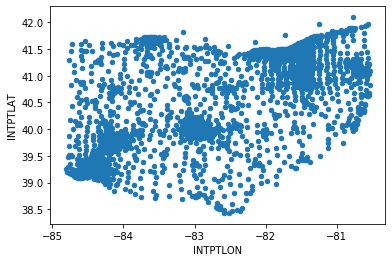

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

td.plot(kind = "scatter", x = "INTPTLON", y = "INTPTLAT")

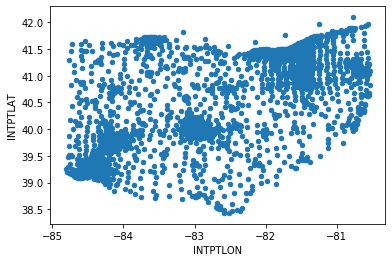

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

td.plot(kind = "scatter", x = "INTPTLON", y = "INTPTLAT")

As you can see, the geographic centers of each census tract do appear to make up the state of Ohio.

This data should be good enough to put into algorithms for redistricting purposes. However, for mapping, we will need polygonal data for each tract to plot it onto a map. This data should be located in the .shp file in the same data set but the file is to large to upload to github. Please see the README for details on how to install this file for yourself since it does not exist in the repo.

## Preparing Data for Algorithms

### Lloyd's Algorithm

We will now prepare the data for LLoyd's algorithm. The input requires:

1. Census Tract ID - This will be the geographic ID since census tracts are not unique across the state
2. Population data
3. Geographic Centers. Latitude and Longitude.

We will now get the geographic id and population id into a single dataframe.

In [81]:
# Prepping data by combining oh_block_pop_df and td. td needs the population data from oh_block_pop_df

names = []
pops = []
# full_name = oh_block_pop_df['NAME'].str.split(',')
for n in range(len(oh_block_pop_df)):
#     name = full_name[n][0][13:]
    tract = oh_block_pop_df['GEOID'][n]
    pop = oh_block_pop_df['B01001_001E'][n]
    names.append(int(tract))
    pops.append(int(pop))
#     print(int(tract))

tracts = {
    'GEOID' : names,
    'POPS' : pops
}
sTract = pd.DataFrame(tracts)
sTract

,GEOID,POPS
0,39009973700,4026
1,39009973800,4932
2,39009972700,4055
3,39009973600,3939
4,39009972600,4357
5,39009973300,3640
6,39009972900,5672
7,39009973200,5168
8,39049007811,3749
9,39049002600,4072


To improve effeciency, we will order all of the data frames by the geographic id's so this way the combination will have effeciency O(n) instead of O(n^2)

In [92]:
#Order the dataframes
td.sort_values(['GEOID'], inplace = True)
sTract.sort_values(['GEOID'], inplace = True)
oh_block_pop_df.sort_values(['GEOID'], inplace = True)
td.reset_index(drop = True, inplace = True)
sTract.reset_index(drop = True, inplace = True)
oh_block_pop_df.reset_index(drop = True, inplace = True)

In [85]:
td

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,39,001,770100,39001770100,7701,Census Tract 7701,G5020,S,286755226,1535831,+38.9560042,-083.3557407
1,39,001,770200,39001770200,7702,Census Tract 7702,G5020,S,222687010,102314,+38.9909749,-083.5518337
2,39,001,770300,39001770300,7703,Census Tract 7703,G5020,S,389153867,170790,+38.8403307,-083.5815269
3,39,001,770400,39001770400,7704,Census Tract 7704,G5020,S,96485498,242467,+38.7716214,-083.5445111
4,39,001,770500,39001770500,7705,Census Tract 7705,G5020,S,394824245,1580106,+38.7507835,-083.3646628
5,39,001,770600,39001770600,7706,Census Tract 7706,G5020,S,122303088,2534431,+38.7060421,-083.5610405
6,39,003,010100,39003010100,101,Census Tract 101,G5020,S,20489718,231126,+40.8917469,-083.8991177
7,39,003,010200,39003010200,102,Census Tract 102,G5020,S,180861496,729630,+40.8652862,-084.0034720
8,39,003,010300,39003010300,103,Census Tract 103,G5020,S,74841111,305797,+40.8240378,-084.1599836
9,39,003,010600,39003010600,106,Census Tract 106,G5020,S,146652802,2873596,+40.7249174,-084.3146099


In [86]:
sTract

,GEOID,POPS
0,39001770100,4493
1,39001770200,4998
2,39001770300,7133
3,39001770400,4149
4,39001770500,3567
5,39001770600,3586
6,39003010100,4535
7,39003010200,4076
8,39003010300,1509
9,39003010600,4899


We will now verify that there is a perfect lineup in the geographic data. If there is, this method will return 2952 true values.

In [88]:
truths = []
for n in range(len(sTract)):
    truths.append(int(td['GEOID'][n]) == int(sTract['GEOID'][n]))
pd.Series(truths).value_counts()

True    2952
dtype: int64

In [87]:
int(td['GEOID'][0]) == int(sTract['GEOID'][0])
print(int(td['GEOID'][0]), int(sTract['GEOID'][0]))

39001770100 39001770100


This will extract the population data, in order of geoid, and place into a seperate list.

In [89]:
pops = []
for n in range(len(oh_block_pop_df)):
    if int(td['GEOID'][n]) == int(sTract['GEOID'][n]):
        pops.append(sTract['POPS'][n])
    else:
        pops.append('null')
pops

[4493,
 4998,
 7133,
 4149,
 3567,
 3586,
 4535,
 4076,
 1509,
 4899,
 7542,
 4641,
 5624,
 2759,
 7572,
 2967,
 2713,
 2650,
 2486,
 2907,
 2474,
 3553,
 3699,
 3813,
 2154,
 1863,
 1685,
 1641,
 4402,
 2482,
 2149,
 1222,
 2321,
 1147,
 1130,
 2942,
 3408,
 3397,
 1795,
 8281,
 5904,
 3759,
 3443,
 3054,
 5367,
 5344,
 4268,
 4960,
 5004,
 3915,
 4994,
 3151,
 3563,
 4329,
 2106,
 1706,
 4535,
 2514,
 3308,
 4361,
 2897,
 2424,
 3702,
 3588,
 1834,
 5005,
 4708,
 5264,
 3425,
 1896,
 5786,
 7638,
 3310,
 4504,
 8074,
 0,
 4357,
 4055,
 4461,
 5672,
 3786,
 4504,
 5168,
 3640,
 3243,
 3784,
 3939,
 4026,
 4932,
 6660,
 3336,
 4100,
 4359,
 3584,
 6444,
 4883,
 3645,
 3721,
 3686,
 4131,
 1838,
 5387,
 4143,
 3602,
 3456,
 3767,
 2328,
 2157,
 6804,
 4951,
 3640,
 3808,
 4403,
 1489,
 1462,
 1219,
 3154,
 2549,
 1231,
 6059,
 4126,
 4541,
 4380,
 4880,
 7567,
 4172,
 5355,
 3482,
 2744,
 5339,
 5880,
 5078,
 4301,
 3260,
 4360,
 4640,
 4995,
 4750,
 5290,
 4470,
 4688,
 7125,
 3044,
 5

All of the data will be written to the the algorithm folder.

In [96]:
with open('../AlgorithmDevelopment/tract_data.csv', 'w') as wr:
    wr.write('GEOID, POP, FULL_NAME, LAT, LON\n')
    for index in range(len(td)):
        wr.write(str(sTract['GEOID'][index]) + ',' + str(pops[index]) + ',')
        wr.write(str(oh_block_pop_df['NAME'][index]).replace(',', ' ') + ',' + str(td['INTPTLAT'][index]) + ',')
        wr.write(str(td['INTPTLON'][index]) + '\n')